Data Wrangling II 
Create an “Academic performance” dataset of students and perform the following operations using Python. 
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or inconsistencies, use any of the suitable techniques to deal with them. 
2. Scan  all  numeric  variables  for  outliers.  If  there  are  outliers,  use  any  of  the  suitable techniques to deal with them. 
3. Apply data transformations on at least one of the variables. The purpose of this transformation  should  be  one  of  the  following  reasons:  to  change  the  scale  for  better understanding  of  the  variable,  to  convert  a  non-linear  relation  into  a  linear  one,  or  to decrease the skewness and convert the distribution into a normal distribution. Reason and document your approach properly.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('CarPrice_Assignment.csv')
df.head(3)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [16]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**1. Missing values**

In [17]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [18]:
# fill the missing numeric values with their mean
# inplace = True, data is modified in place, which means it will return nothing and the dataframe is now updated
df.fillna(df.mean(), inplace=True) 

In [19]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

**Categorical to quantitative**

In [20]:
df['fueltype'].unique()

array(['gas', 'diesel'], dtype=object)

In [2]:
# It converts categorical data into dummy or indicator variables
g_hot = pd.get_dummies(df['fueltype']).add_prefix('fuel'+' - ')
# df = df.drop('fueltype',axis = 1)
df = df.join(g_hot)
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,fuel - diesel,fuel - gas
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,13495.0,0,1
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,3.47,2.68,9.0,111,5000,21,27,16500.0,0,1
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,2.68,3.47,9.0,154,5000,19,26,16500.0,0,1
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,3.19,3.40,10.0,102,5500,24,30,13950.0,0,1
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,3.19,3.40,8.0,115,5500,18,22,17450.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,3.78,3.15,9.5,114,5400,23,28,16845.0,0,1
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,3.78,3.15,8.7,160,5300,19,25,19045.0,0,1
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,3.58,2.87,8.8,134,5500,18,23,21485.0,0,1
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,3.01,3.40,23.0,106,4800,26,27,22470.0,1,0


**3. Outliers - Detection & Handling**

<AxesSubplot:>

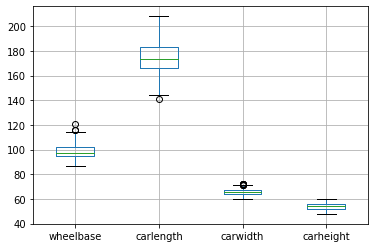

In [21]:
df.boxplot(column=["wheelbase", "carlength", "carwidth", "carheight"])

In [17]:
def outlierDetection (i,df):
    Q1 = np.percentile(df[i], 25)
    Q3 = np.percentile(df[i], 75)
    IQR = Q3 - Q1
    # Upper bound
    upper = np.where(df[i] >= (Q3+1.5*IQR))
    # Lower bound
    lower = np.where(df[i] <= (Q1-1.5*IQR))

    ''' Removing the Outliers '''
    df.drop(upper[0], axis=0, inplace = True)
    df.drop(lower[0], axis=0, inplace = True)

In [18]:
outlierDetection('wheelbase',df)
df = df.reset_index(drop=True)

In [19]:
outlierDetection('carlength',df)
df = df.reset_index(drop=True)

In [20]:
outlierDetection('carwidth',df)
df = df.reset_index(drop=True)

In [21]:
outlierDetection('carheight',df)
df = df.reset_index(drop=True)

<AxesSubplot:>

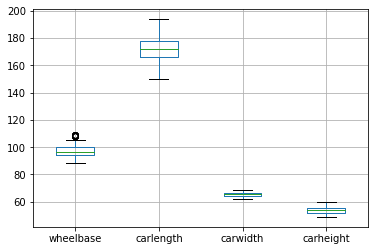

In [22]:
df.boxplot(column=["wheelbase", "carlength", "carwidth", "carheight"])

**Quantile Plot** <br>
A Q-Q plot is a scatterplot created by plotting two sets of quantiles against one another. If both sets of quantiles came from the same distribution, we should see the points forming a line that's roughly straight. Here's an example of a Normal Q-Q plot when both sets of quantiles truly come from Normal distributions.

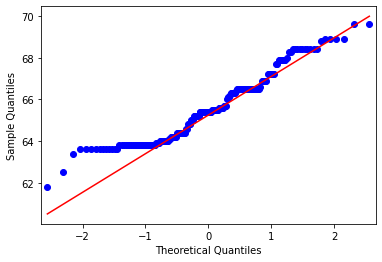

In [9]:
import statsmodels.api as sm
import pylab as py
  
data_points = df['carlength']    
  
sm.qqplot(df['carwidth'], line ='q')
py.show()

**Normalization** <br>
https://www.geeksforgeeks.org/data-normalization-with-pandas/

In [11]:
df1 = df[["wheelbase", "carlength", "carwidth", "carheight"]]
df1.describe()

,wheelbase,carlength,carwidth,carheight
count,190.000000,190.000000,190.000000,190.000000
mean,98.113158,172.812632,65.548947,53.645789
std,5.331298,11.169594,1.606624,2.394362
min,86.600000,144.600000,61.800000,48.800000
25%,94.500000,166.300000,64.000000,52.000000
50%,96.500000,172.400000,65.400000,53.900000
75%,100.400000,177.800000,66.500000,55.500000
max,114.200000,199.600000,69.600000,59.800000


<AxesSubplot:>

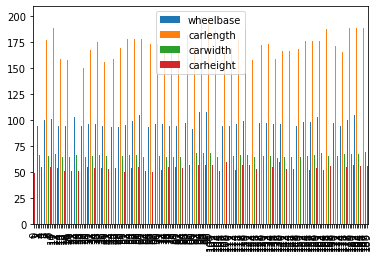

In [12]:
df1.plot(kind='bar')

(array([[  0.,   0.,  36., 148.,   6.,   0.,   0.,   0.,   0.,   0.],
        [  0.,   0.,   0.,   0.,   0.,   0.,   5.,  67.,  81.,  37.],
        [ 38., 152.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
        [190.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([ 48.8 ,  63.88,  78.96,  94.04, 109.12, 124.2 , 139.28, 154.36,
        169.44, 184.52, 199.6 ]),
 <a list of 4 BarContainer objects>)

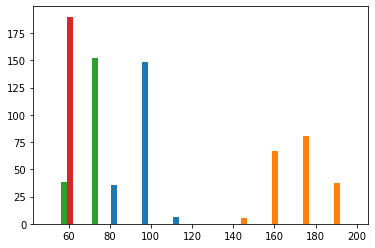

In [13]:
plt.hist(df1)

In [14]:

# copy the data
df_max_scaled = df1.copy()
  
# apply normalization techniques
# maximum absolute scaling - The maximum absolute scaling rescales each feature between -1 and 1 by dividing every 
# observation by its maximum absolute value.
for column in df_max_scaled.columns:
    df_max_scaled[column] = df_max_scaled[column]  / df_max_scaled[column].abs().max()
      
# view normalized data
display(df_max_scaled)

,wheelbase,carlength,carwidth,carheight
0,0.775832,0.845691,0.920977,0.816054
1,0.775832,0.845691,0.920977,0.816054
2,0.827496,0.857715,0.941092,0.876254
3,0.873905,0.884770,0.951149,0.908027
4,0.870403,0.884770,0.954023,0.908027
...,...,...,...,...
185,0.955342,0.945892,0.989943,0.928094
186,0.955342,0.945892,0.988506,0.928094
187,0.955342,0.945892,0.989943,0.928094
188,0.955342,0.945892,0.989943,0.928094


<AxesSubplot:>

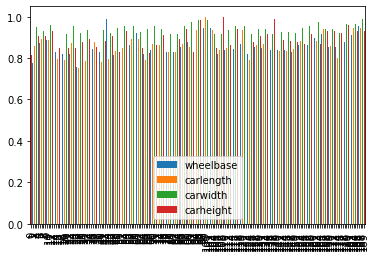

In [15]:
df_max_scaled.plot(kind='bar')

(array([[  0.,   8.,   9., 101.,  34.,  24.,  16.,   6.,   6.,   1.],
        [  3.,   3.,  29.,  23.,  54.,  39.,  23.,  20.,   8.,   3.],
        [  0.,   0.,   0.,   0.,   1.,   2.,  82.,  79.,  27.,  14.],
        [  0.,   0.,   0.,   1.,  11.,  49.,  39.,  69.,  26.,  10.]]),
 array([0.6780394 , 0.71023546, 0.74243152, 0.77462758, 0.80682364,
        0.8390197 , 0.87121576, 0.90341182, 0.93560788, 0.96780394,
        1.        ]),
 <a list of 4 BarContainer objects>)

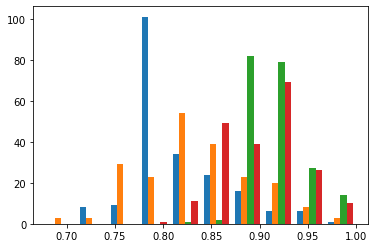

In [13]:
plt.hist(df_max_scaled)

A histogram shows the number of occurrences of different values in a dataset. At first glance, 
it is very similar to a bar chart.

Bins are the buckets that your histogram will be grouped by. On the back end, Pandas will group your data into bins, 
or buckets. Then pandas will count how many values fell into that bucket, and plot the result.


(array([1., 0., 0., 1., 0., 0., 1., 0., 0., 1.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

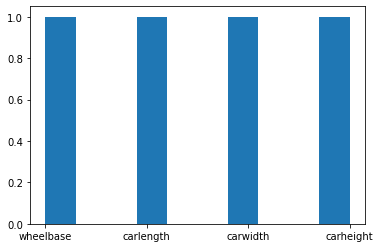

In [12]:
plt.hist(["wheelbase", "carlength", "carwidth", "carheight"])

In [16]:
df.to_csv("output.csv")